In [1]:
# Definitions
# Unacceptable terms or policies: A privacy policy excerpt will be deemed unacceptable if any of the following criteria are not met.
# Must not use user’s privacy data for any purpose without explicitly notifying them
# Must not store user’s data for any purpose without explicitly notifying them
# Must not copyright user’s content without asking for their explicit consent
# Must not use third party cookies to track user activities for any reason
# Must not track users’ data/history/biometrics
# Must not read users private information/ messages/ data/ storage without their consent
# Is not transparent with users about privacy changes/Does not notify user of privacy policy changes for any reason
# Does not inform the user of usage of their personal data or content

# Must not limit user rights unreasonably: The policy should not place unreasonable restrictions on users' rights, 
# such as making it overly difficult for users to exercise their right to access, correct, or delete their data.

#Must not ignore security measures: The policy should detail security measures in place to protect user data and 
#                                    ensure confidentiality, integrity, and availability.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Step 1: Data Collection
# Assuming we have a list of policies and their corresponding labels
df = pd.read_csv('dataset_testv2.csv', delimiter = ',')

policies = df['original_text']
labels = df['acceptable']

# Step 2: Data Preprocessing and Labeling
# No preprocessing needed as an example, but we can add text cleaning if required

# Step 3: Feature Extraction
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')
X = vectorizer.fit_transform(policies.values.astype('U'))

# Step 4: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=31)

# Cross Validation
neighbors = range(1,20)
cv_scores = []
for maxNeighbor in neighbors:
    kt = KNeighborsClassifier(n_neighbors = maxNeighbor,weights='uniform',leaf_size=30)
    scores = cross_val_score(kt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
maxNeigbor_best = neighbors[np.argmax(cv_scores)]
print('cv_scores:', cv_scores)
print('maxNeighbor_best:',maxNeigbor_best)

classifier = KNeighborsClassifier(n_neighbors=maxNeigbor_best,weights='uniform',leaf_size=30)
trained_classifier=classifier.fit(X_train, y_train)
predicted_label = trained_classifier.predict(X_test)

#Evaluation of Trained Model                                    
print('Confusion Matrix')
cfm= confusion_matrix(y_test,predicted_label)
print(cfm)
print('---------')

print('Classification Accuracy')
accuracy=accuracy_score(y_test,predicted_label)
print(accuracy)
print('---------')

print('Precision Score')
precision11 = precision_score(y_test, predicted_label,average='macro')
print(precision11)
print('---------')

print('Recall Score')
recall = recall_score(y_test,predicted_label,average='macro')
print(recall)
print('---------')

print('F1 Score')
F1 = f1_score(y_test,predicted_label,average='macro')
print(F1)
print('---------')

cv_scores: [0.6950187969924813, 0.7072055137844612, 0.7089285714285715, 0.7158208020050124, 0.7247180451127819, 0.724592731829574, 0.7247180451127819, 0.7298558897243108, 0.7369674185463658, 0.7352130325814537, 0.7333646616541353, 0.7405075187969925, 0.7299498746867169, 0.7422932330827068, 0.743984962406015, 0.7511278195488722, 0.7334273182957394, 0.744016290726817, 0.7316416040100251]
maxNeighbor_best: 16
Confusion Matrix
[[48 24]
 [11 59]]
---------
Classification Accuracy
0.7535211267605634
---------
Precision Score
0.7622013477639371
---------
Recall Score
0.7547619047619047
---------
F1 Score
0.7520331287731377
---------


In [7]:
#Prediction1
new_policy = "We collect and use your personal information for as long as reasonably required in order to provide the a Services, which may include -developing and testing new or updated products and features without your permission; -for internal record keeping and for marketing."
X_new_feed = vectorizer.transform([new_policy])
feed_predicted_label = classifier.predict(X_new_feed)
print("Predicted Label:", feed_predicted_label[0])

#Prediction2
new_policy2 = "When you upload Posted Content, you automatically grant Vervoe an exclusive, royalty-free, perpetual, irrevocable, worldwide licence to use, reproduce, modify, adapt and publish the content in that Posted Content, including a right to sub-licence as necessary for Vervoe to provide and maintain the Technology. You waive any moral rights you may have in the Posted Content."
X_new_feed2 = vectorizer.transform([new_policy2])
feed_predicted_label2 = classifier.predict(X_new_feed2)
print("Predicted Label:", feed_predicted_label2[0])

#Prediction3
new_policy3 = "You agree that your Posted Content is not rude, offensive, racist, or inappropriate, and does not contain material that is contrary to any law applicable to you."
X_new_feed3 = vectorizer.transform([new_policy3])
feed_predicted_label3 = classifier.predict(X_new_feed3)
print("Predicted Label:", feed_predicted_label3[0])

#Prediction4
new_policy4 = "We are committed to ensuring that the information you provide is secure, and as such we use commercially reasonable endeavors to keep personal information collected through the Site secure. Such endeavours include requesting your username and password to verify your identity before you a grand access to your account."
X_new_feed4 = vectorizer.transform([new_policy4])
feed_predicted_label4 = classifier.predict(X_new_feed4)
print("Predicted Label:", feed_predicted_label4[0])


Predicted Label: 0
Predicted Label: 0
Predicted Label: 1
Predicted Label: 1


Predicted Label: 0
Important words or phrases that causes this prediction and TF scores:
keeping: 0.2934302589422408
internal: 0.2761174399090117
testing: 0.2761174399090117
for: 0.24959426440223514
and: 0.2355354626557902
long: 0.23423733969738172
reasonably: 0.22920816125335303
record: 0.2103424923457341
marketing: 0.20739658880249312
updated: 0.20464088007495218
as: 0.19359127496868916
order: 0.18391034423904346
required: 0.18391034423904346
permission: 0.18074603272330456
new: 0.17924768019584705
include: 0.17640004750271576
features: 0.16446214698492478
products: 0.1551430109697649
your: 0.1422179496626732
collect: 0.13592002896843364
which: 0.1299523805378115
provide: 0.1272547257492274
personal: 0.12639209710677413
without: 0.12193606371824481
information: 0.09450951818532466
services: 0.09350950373040577
we: 0.08445865689379758
may: 0.08093036946689897
use: 0.07672710972357454
in: 0.07580314582359086
or: 0.0601319322137782
the: 0.05399157337273093
to: 0.052908578148319785


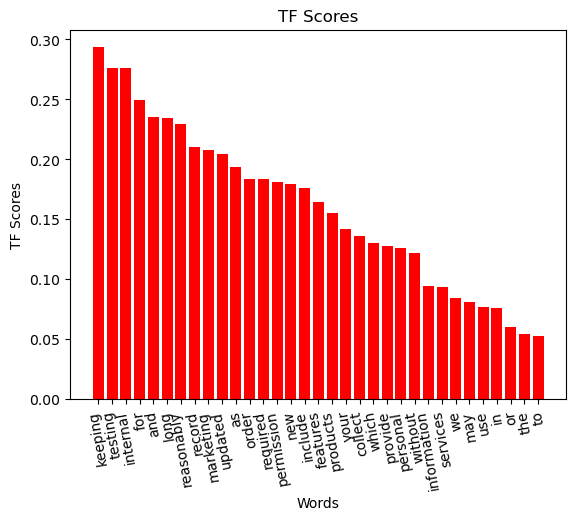

In [9]:
## Prediction

#Prediction
new_policy = "We collect and use your personal information for as long as reasonably required in order to provide the a Services, which may include -developing and testing new or updated products and features without your permission; -for internal record keeping and for marketing."
X_new_feed = vectorizer.transform([new_policy])
X_new_feed = vectorizer.transform([new_policy])
feed_predicted_label = classifier.predict(X_new_feed)
print("Predicted Label:", feed_predicted_label[0])

#Phrase Patterns

# Get the feature names from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF matrix for your new data
new_data_tfidf_matrix = X_new_feed.toarray()

# Find the most important features (words) for each data point
important_features = []
for j in range(len(feature_names)):
    if new_data_tfidf_matrix[0, j] > 0:
        important_features.append((feature_names[j], new_data_tfidf_matrix[0, j]))
    
# Print the important features for each data point
print(f"Important words or phrases that causes this prediction and TF scores:")
for feature, score in sorted(important_features, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")
    
plot_df = pd.DataFrame(important_features)

# Sort DataFrame by ratios descendingly
plot_df.sort_values(by=1, ascending=False, inplace=True)

# Create the bar plot
plt.bar(plot_df[0], plot_df[1],color='r')

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('TF Scores')
plt.title('TF Scores')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=100)

# Display the plot
plt.show()    
    

Predicted Label: 0
Important words or phrases that causes this prediction and TF scores:
posted: 0.4259592534050244
licence: 0.4018690357996324
content: 0.29978335394277994
moral: 0.18506193195778128
you: 0.1812444145213241
maintain: 0.16679798058146014
upload: 0.16352417487972806
waive: 0.16352417487972806
adapt: 0.16056265738782563
sub: 0.16056265738782563
reproduce: 0.15306916979696525
perpetual: 0.1489200269059593
publish: 0.1489200269059593
irrevocable: 0.14703627347775317
technology: 0.14526022350340692
royalty: 0.13764367668109298
necessary: 0.1338341264088164
grant: 0.13266144326310414
automatically: 0.131531412718912
worldwide: 0.131531412718912
exclusive: 0.12549851639969992
the: 0.1178712663337442
free: 0.11748714323171915
to: 0.11550693407668106
modify: 0.11170449590537779
in: 0.11032601610656599
rights: 0.09594938615366591
provide: 0.09260504145381149
when: 0.09260504145381149
right: 0.09228958275111356
an: 0.09016673882732455
have: 0.08683436116606533
and: 0.0857012230966

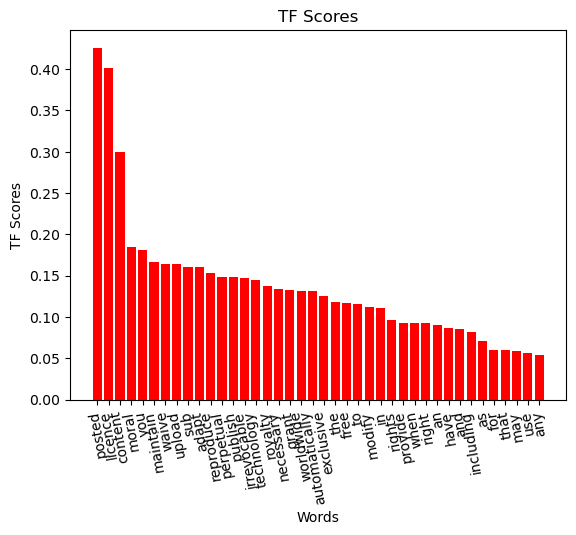

In [10]:
## Prediction

#Prediction
new_policy = "When you upload Posted Content, you automatically grant Vervoe an exclusive, royalty-free, perpetual, irrevocable, worldwide licence to use, reproduce, modify, adapt and publish the content in that Posted Content, including a right to sub-licence as necessary for Vervoe to provide and maintain the Technology. You waive any moral rights you may have in the Posted Content."
X_new_feed = vectorizer.transform([new_policy])
X_new_feed = vectorizer.transform([new_policy])
feed_predicted_label = classifier.predict(X_new_feed)
print("Predicted Label:", feed_predicted_label[0])

#Phrase Patterns

# Get the feature names from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF matrix for your new data
new_data_tfidf_matrix = X_new_feed.toarray()

# Find the most important features (words) for each data point
important_features = []
for j in range(len(feature_names)):
    if new_data_tfidf_matrix[0, j] > 0:
        important_features.append((feature_names[j], new_data_tfidf_matrix[0, j]))
    
# Print the important features for each data point
print(f"Important words or phrases that causes this prediction and TF scores:")
for feature, score in sorted(important_features, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")
    
plot_df = pd.DataFrame(important_features)

# Sort DataFrame by ratios descendingly
plot_df.sort_values(by=1, ascending=False, inplace=True)

# Create the bar plot
plt.bar(plot_df[0], plot_df[1],color='r')

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('TF Scores')
plt.title('TF Scores')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=100)

# Display the plot
plt.show()    
    

Predicted Label: 1
Important words or phrases that causes this prediction and TF scores:
racist: 0.365812983975993
inappropriate: 0.3442294771678947
contrary: 0.32891573538058794
offensive: 0.29912656011670463
contain: 0.2801402258382787
posted: 0.2432429772428736
material: 0.23580324254204565
is: 0.23564583275177728
not: 0.2197402590485937
that: 0.20628729095934817
applicable: 0.18939396600201885
does: 0.18939396600201885
law: 0.17809960280249343
you: 0.15524876139345903
agree: 0.14698509407788438
to: 0.13191989756021497
content: 0.12839290664187003
any: 0.09211463569019732
your: 0.08864997892274422
or: 0.07496514379484724
and: 0.07340920695847604


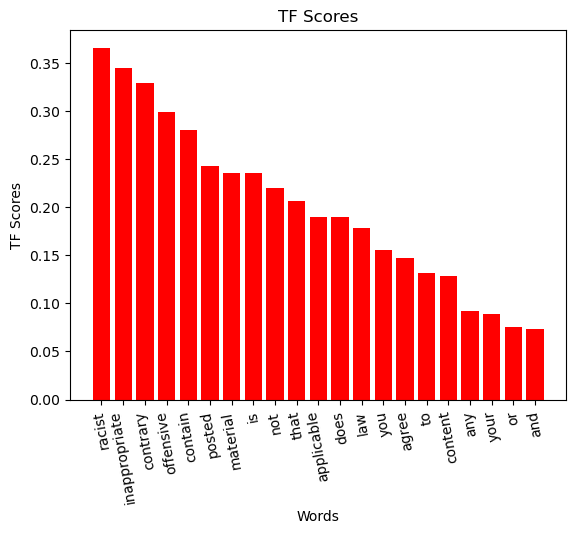

In [5]:
## Prediction

#Prediction
new_policy = "You agree that your Posted Content is not rude, offensive, racist, or inappropriate, and does not contain material that is contrary to any law applicable to you."
X_new_feed = vectorizer.transform([new_policy])
X_new_feed = vectorizer.transform([new_policy])
feed_predicted_label = classifier.predict(X_new_feed)
print("Predicted Label:", feed_predicted_label[0])

#Phrase Patterns

# Get the feature names from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF matrix for your new data
new_data_tfidf_matrix = X_new_feed.toarray()

# Find the most important features (words) for each data point
important_features = []
for j in range(len(feature_names)):
    if new_data_tfidf_matrix[0, j] > 0:
        important_features.append((feature_names[j], new_data_tfidf_matrix[0, j]))
    
# Print the important features for each data point
print(f"Important words or phrases that causes this prediction and TF scores:")
for feature, score in sorted(important_features, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")
    
plot_df = pd.DataFrame(important_features)

# Sort DataFrame by ratios descendingly
plot_df.sort_values(by=1, ascending=False, inplace=True)

# Create the bar plot
plt.bar(plot_df[0], plot_df[1],color='r')

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('TF Scores')
plt.title('TF Scores')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=100)

# Display the plot
plt.show()    
    

Predicted Label: 1
Important words or phrases that causes this prediction and TF scores:
secure: 0.39070578328679656
ensuring: 0.2702263438399613
verify: 0.24888013159513334
commercially: 0.24126133867037966
identity: 0.22431789681297995
username: 0.21593233614929913
your: 0.20877549374511037
to: 0.20711899451918253
such: 0.1968850123960427
keep: 0.19535289164339828
password: 0.1930935484800411
information: 0.18498622590237263
before: 0.179986530131679
collected: 0.17688973069753033
include: 0.17263646912546443
reasonable: 0.17263646912546443
we: 0.16531338307037366
site: 0.1346172863190501
through: 0.13098128367054898
provide: 0.12453968603686298
personal: 0.12369546198416066
you: 0.12187307583939166
access: 0.11749333589017978
account: 0.11713464124729793
and: 0.11525510112490842
the: 0.10567927527857622
are: 0.09515043692575474
as: 0.094730456814579
is: 0.09249311295118631
that: 0.08096962072397743
use: 0.07509010057764338


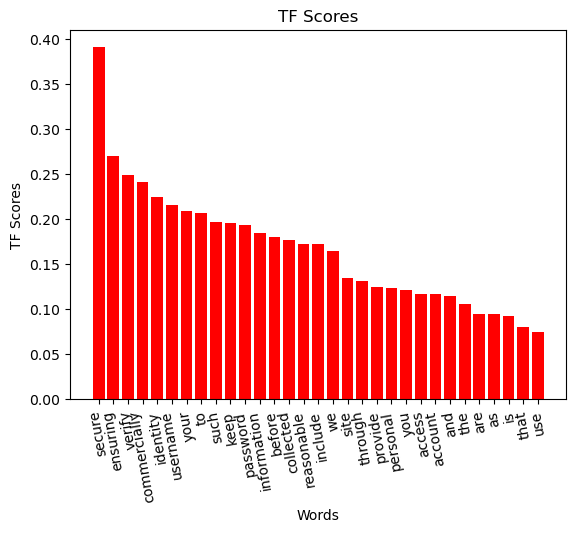

In [11]:
## Prediction

#Prediction
new_policy = "We are committed to ensuring that the information you provide is secure, and as such we use commercially reasonable endeavors to keep personal information collected through the Site secure. Such endeavours include requesting your username and password to verify your identity before you a grand access to your account."
X_new_feed = vectorizer.transform([new_policy])
X_new_feed = vectorizer.transform([new_policy])
feed_predicted_label = classifier.predict(X_new_feed)
print("Predicted Label:", feed_predicted_label[0])

#Phrase Patterns

# Get the feature names from TfidfVectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF matrix for your new data
new_data_tfidf_matrix = X_new_feed.toarray()

# Find the most important features (words) for each data point
important_features = []
for j in range(len(feature_names)):
    if new_data_tfidf_matrix[0, j] > 0:
        important_features.append((feature_names[j], new_data_tfidf_matrix[0, j]))
    
# Print the important features for each data point
print(f"Important words or phrases that causes this prediction and TF scores:")
for feature, score in sorted(important_features, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")
    
plot_df = pd.DataFrame(important_features)

# Sort DataFrame by ratios descendingly
plot_df.sort_values(by=1, ascending=False, inplace=True)

# Create the bar plot
plt.bar(plot_df[0], plot_df[1],color='r')

# Set plot labels and title
plt.xlabel('Words')
plt.ylabel('TF Scores')
plt.title('TF Scores')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=100)

# Display the plot
plt.show()    
    